In [139]:
import pandas as pd

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


In [141]:
import numpy as np

In [142]:
from sklearn.metrics import r2_score


In [143]:
from sklearn.preprocessing import StandardScaler


In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [145]:
import statsmodels.api as sm


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
from sklearn.linear_model import LinearRegression


In [148]:
from sklearn.metrics import mean_absolute_error

In [149]:
from sklearn.metrics import mean_squared_error


In [150]:
from sklearn.metrics import mean_absolute_percentage_error

In [151]:
df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_300.csv')

In [152]:
df.columns

Index(['time', 'central-heating-flow', 'central-heating-return',
       'hot-water-cold-pipe', 'hot-water-hot-pipe', 'gas',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric_combined_1W_lagged',
       'electric-combined', 'electric_combined_1h_forecast'],
      dtype='object')

In [153]:
df_new = df.copy()

In [154]:
df_new.head()

,time,central-heating-flow,central-heating-return,hot-water-cold-pipe,hot-water-hot-pipe,gas,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
0,2018-02-21 19:00:00,87230,69435,15730.0,23026.0,0.0,3.5,77,2,10.0,159,2,19,NaN,31.62,102126.0
1,2018-02-21 20:00:00,125571,103010,5000.0,7118.0,0.0,3.2,77,2,12.2,166,2,20,NaN,28.37,80283.0
2,2018-02-21 21:00:00,101350,84950,0.0,0.0,0.0,2.7,81,1,13.8,171,2,21,NaN,22.30,60677.0
3,2018-02-21 22:00:00,129391,107245,0.0,0.0,0.0,2.3,84,0,14.6,170,2,22,NaN,16.85,46053.0
4,2018-02-21 23:00:00,106009,88750,0.0,0.0,0.0,1.8,85,0,14.6,170,2,23,NaN,12.79,40603.0


In [155]:
df_new = df_new.iloc[168:]

In [156]:
def corr_map(df):
    corr = df.corr()
    electric_corr = corr[['electric_combined_1h_forecast']].sort_values(by='electric_combined_1h_forecast', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(electric_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.show()



In [157]:
def lagged1W_v_electric(df, axs=None):
    fig1 = sns.scatterplot(x='electric_combined_1W_lagged',
                            y='electric-combined', 
                            data=df, hue='electric-combined',
                            palette='coolwarm',
                            ax=axs,
                            legend=True,
                            alpha = 0.5)

In [158]:
def pipe_v_electric(df, axs=None):
    sns.scatterplot(x='hot-water-hot-pipe',
                    y='electric_combined_1h_forecast',
                    data=df,
                    hue='electric_combined_1h_forecast',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha=0.5)
    


In [159]:
def electric_v_forecast(df, axs=None):
    sns.scatterplot(x='electric-combined',
                    y='electric_combined_1h_forecast',
                    data=df,
                    hue='electric_combined_1h_forecast',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha = 0.5)


In [160]:
def hour_v_electric(df, axs=None):
    sns.scatterplot(x='hour',
                    y='electric_combined_1h_forecast',
                    data=df,
                    hue='electric_combined_1h_forecast',
                    palette='coolwarm',
                    ax=axs,
                    alpha = 0.5)


In [161]:
def day_v_electric(df, axs=None):
    sns.scatterplot(x='day',
                    y='electric_combined_1h_forecast',
                    data=df,
                    hue='electric_combined_1h_forecast',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha = 0.5)


In [162]:
def gas_v_electric(df, axs=None):
    sns.scatterplot(x='gas',
                    y='electric_combined_1h_forecast',
                    data=df,
                    hue='electric_combined_1h_forecast',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha = 0.5)
    


In [163]:
def heating_v_electric(df, axs=None):
    fig1 = sns.scatterplot(x='gas',
                            y='central-heating-flow', 
                            data=df, hue='electric_combined_1h_forecast',
                            palette='coolwarm',
                            ax=axs,
                            legend=True,
                            alpha = 0.5)
  


In [164]:
def lagged_v_electric(df, axs=None):
    sns.scatterplot(x='electric_combined_1h_forecast',
                    y='electric-combined',
                    data=df,
                    hue='electric-combined',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha = 0.5)


In [165]:
def multi_plot(df):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    plt.suptitle('Scatter Plots of Features vs Electric Combined')
    try:
        fig1= lagged1W_v_electric(df, axs[0,0])
        axs[0,0].set_title('Electric Combined vs Electric Combined 1 Week Lagged')
    except:
        pass
    try:
        fig2 = pipe_v_electric(df, axs[0,1])
        axs[0,1].set_title('Hot Water Hot Pipe vs electric_combined_1h_forecast')
    except:
        pass
    try:
        fig3 = lagged_v_electric(df, axs[0,2])
        axs[0,2].set_title('Electric Combined vs Electric Combined 1 Hour Lagged')
    except:
        pass
    try:
        fig4 = hour_v_electric(df, axs[1,0])
        axs[1,0].set_title('Hour vs electric_combined_1h_forecast')
    except:
        pass
    try:
        fig5 = day_v_electric(df, axs[1,1])
        axs[1,1].set_title('Day vs electric_combined_1h_forecast')
    except:
        pass
    try:
        fig6 = gas_v_electric(df, axs[1,2])
        axs[1,2].set_title('Gas vs electric_combined_1h_forecast')
    except:
       pass

    plt.tight_layout()



In [166]:
def feature_choice(homeid):
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_{homeid}.csv')
    df_features = df.iloc[:,1:]
    target_col = df_features.pop('electric_combined_1h_forecast')
    df_features = df_features.assign(electric_combined_1h_forecast= target_col)
    corr_map(df_features)
    multi_plot(df_features)
    df_features.fillna(0, inplace=True)


    return df_features
    

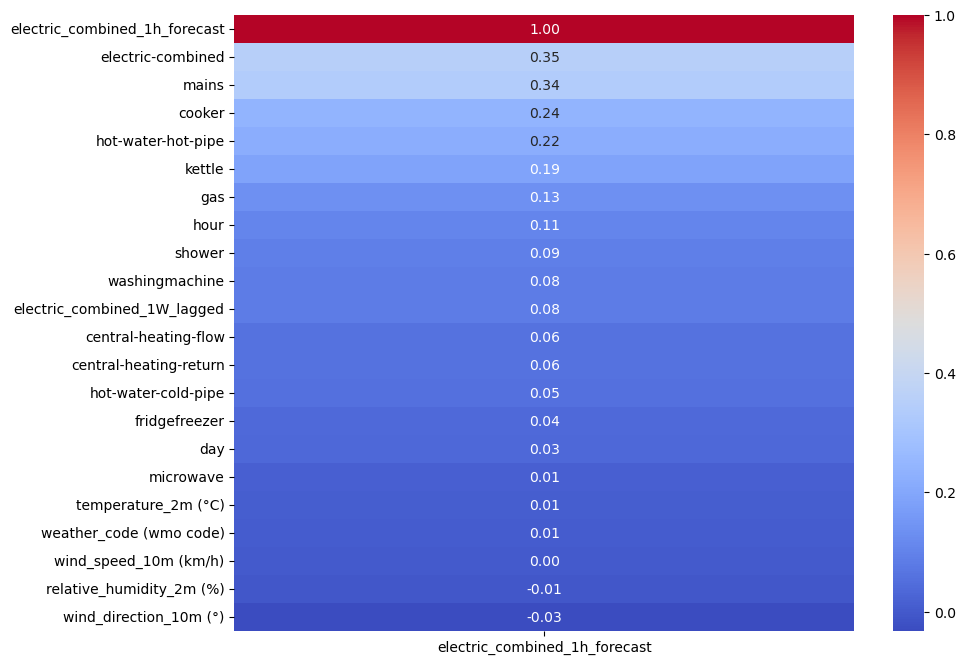

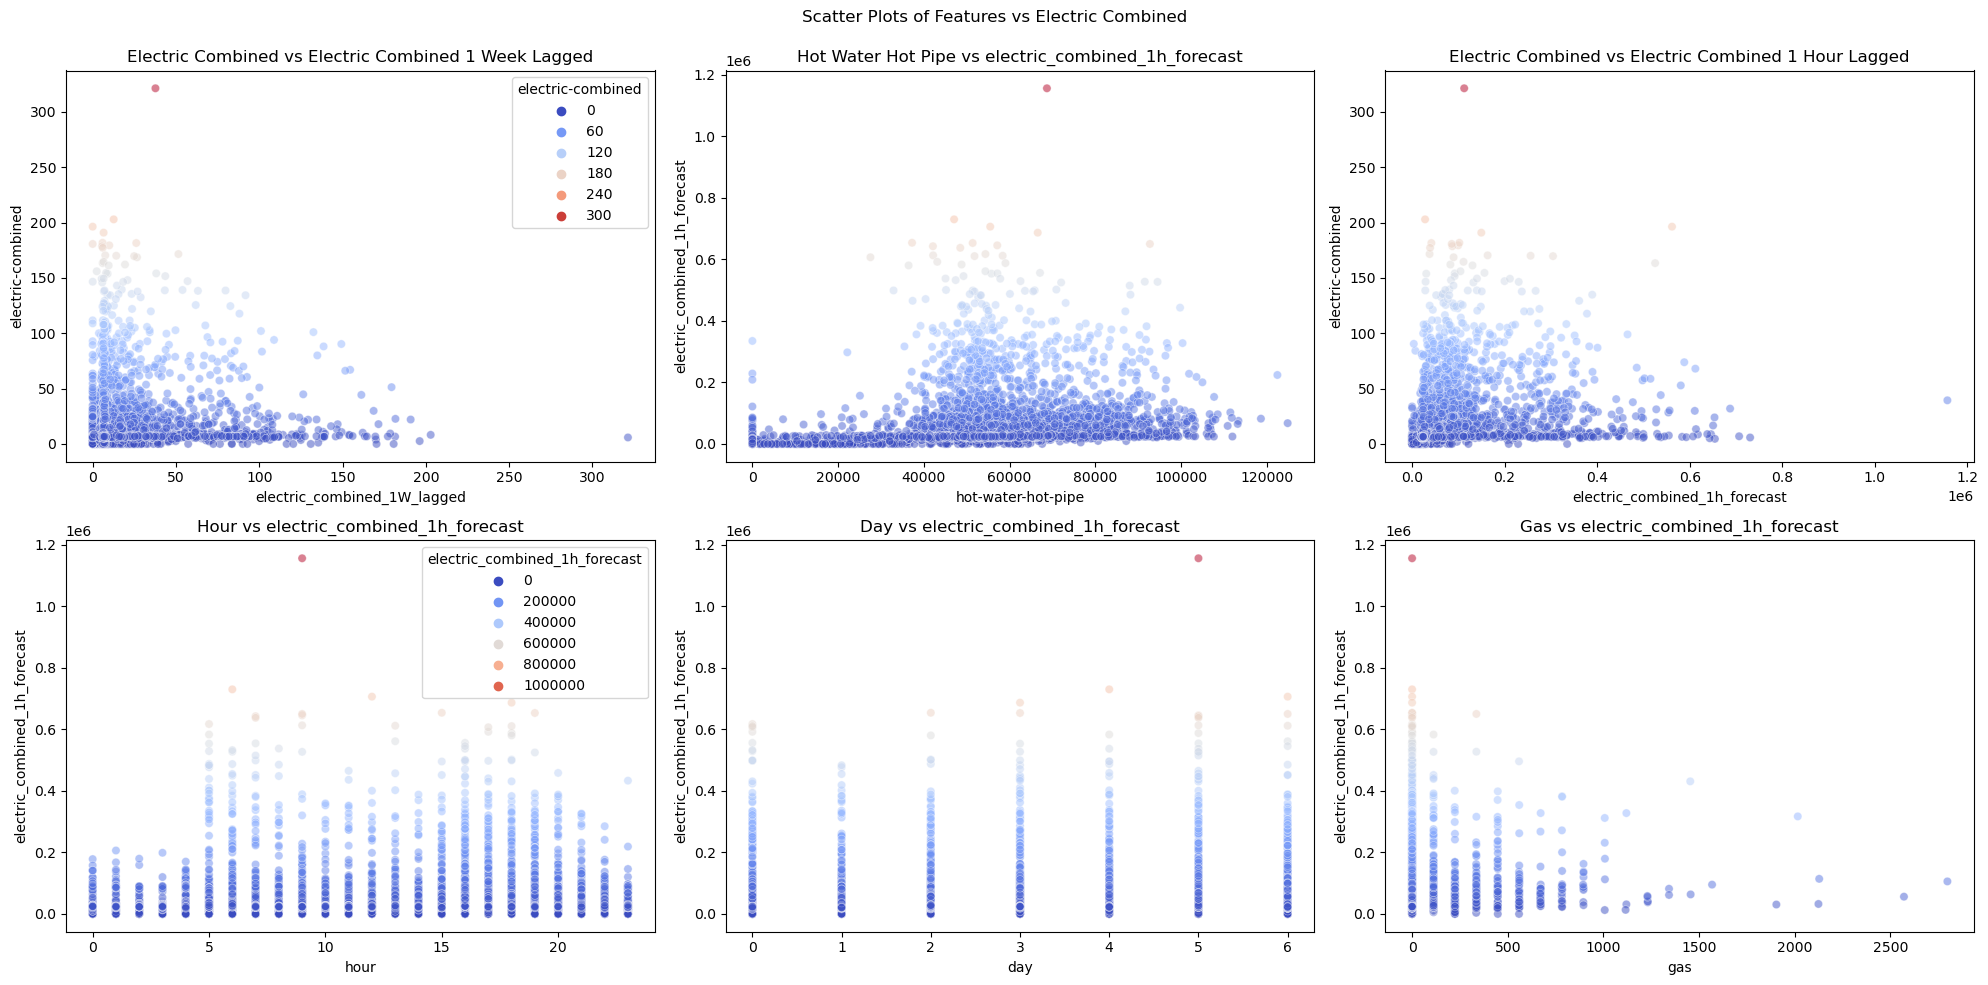

In [167]:
df_features = feature_choice(106)

Lets compute VIF

In [168]:
def compute_vif(df, feature_list):
    #make a deep copy of df
    df_copy = df.copy(deep=True)
    scaler = StandardScaler()
    scaler.fit(df_copy[feature_list])
    df_copy[feature_list] = scaler.transform(df_copy[feature_list])
    
    df_copy = df_copy[feature_list]

    df_copy['intercept'] = 1
    #display(df_copy.head())
    vif = pd.DataFrame()
    vif["variable"] = df_copy.columns


    columns_to_be_replaced = ['electric_combined_1W_lagged', 'predicted_temperature_2m', 'predicted_wind_speed', 'predicted_humidity', 'predicted_wind_direction']

    for col in columns_to_be_replaced:
      if col in feature_list:
        df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)
      else:
         pass
   
    vif['vif'] = [variance_inflation_factor(df_copy.values, i) for i in list(range(df_copy.shape[1]))]
    vif = vif[vif['variable']!= 'intercept']
    print([vif.variable])
    return vif.sort_values(by='vif', ascending=True)



In [169]:
feature_list = ['electric-combined','electric_combined_1W_lagged','hot-water-hot-pipe', 'gas',
       'central-heating-flow', 'hot-water-cold-pipe',
       'temperature_2m (°C)', 'relative_humidity_2m (%)','wind_speed_10m (km/h)', 'day', 'hour', 'weather_code (wmo code)']

In [170]:
compute_vif(df_features, feature_list)

[0               electric-combined
1     electric_combined_1W_lagged
2              hot-water-hot-pipe
3                             gas
4            central-heating-flow
5             hot-water-cold-pipe
6             temperature_2m (°C)
7        relative_humidity_2m (%)
8           wind_speed_10m (km/h)
9                             day
10                           hour
11        weather_code (wmo code)
Name: variable, dtype: object]


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_24187/1332687126.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_24187/1332687126.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

,variable,vif
9,day,1.008169
4,central-heating-flow,1.028285
1,electric_combined_1W_lagged,1.032725
11,weather_code (wmo code),1.084482
10,hour,1.102746
3,gas,1.102815
8,wind_speed_10m (km/h),1.106957
0,electric-combined,1.178669
7,relative_humidity_2m (%),1.240126
2,hot-water-hot-pipe,1.486330


In [171]:
feature_list_amended = ['hot-water-hot-pipe', 'gas','electric_combined_1W_lagged', 'electric-combined',
       'central-heating-flow', 'hot-water-cold-pipe',
       'temperature_2m (°C)', 'relative_humidity_2m (%)','wind_speed_10m (km/h)', 'day', 'hour', 'weather_code (wmo code)']

In [172]:
X = df_features.copy(deep=True)
y = df_features.pop('electric_combined_1h_forecast')

In [173]:
X_opt = df_features.copy(deep= True)
X_opt = X_opt[feature_list_amended]

scaler = StandardScaler()
scaler.fit(X_opt[feature_list_amended])
X_opt[feature_list_amended] = scaler.transform(X_opt[feature_list_amended])

In [174]:


      
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     electric_combined_1h_forecast   R-squared (uncentered):                   0.097
Model:                                       OLS   Adj. R-squared (uncentered):              0.095
Method:                            Least Squares   F-statistic:                              83.80
Date:                           Wed, 03 Apr 2024   Prob (F-statistic):                   5.60e-197
Time:                                   11:57:18   Log-Likelihood:                     -1.1947e+05
No. Observations:                           9425   AIC:                                  2.390e+05
Df Residuals:                               9413   BIC:                                  2.391e+05
Df Model:                                     12                                                  
Covariance Type:                       nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
hot-water-hot-pipe           6831.6183    973.158      7.020      0.000    4924.019    8739.218
gas                          2883.7210    838.257      3.440      0.001    1240.557    4526.885
electric_combined_1W_lagged  2057.2225    811.181      2.536      0.011     467.132    3647.313
electric-combined            2.006e+04    866.606     23.148      0.000    1.84e+04    2.18e+04
central-heating-flow         1229.4026    809.436      1.519      0.129    -357.267    2816.072
hot-water-cold-pipe           286.4066   1050.434      0.273      0.785   -1772.671    2345.485
temperature_2m (°C)         -1005.7193   1098.451     -0.916      0.360   -3158.920    1147.482
relative_humidity_2m (%)      -77.8078    888.912     -0.088      0.930   -1820.267    1664.651
wind_speed_10m (km/h)         609.7663    839.829      0.726      0.468   -1036.480    2256.013
day                          1428.8224    801.479      1.783      0.075    -142.250    2999.895
hour                         2632.8018    838.230      3.141      0.002     989.689    4275.915
weather_code (wmo code)       754.8506    831.260      0.908      0.364    -874.598    2384.300
==============================================================================
Omnibus:                     9813.239   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           650019.471
Skew:                           5.251   Prob(JB):                         0.00
Kurtosis:                      42.306   Cond. No.                         2.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
def forecast(homeid):
    #lets add my time series info to the dataframe
    desired_features = ['hot-water-hot-pipe', 'gas','electric_combined_1W_lagged', 'electric-combined',
       'central-heating-flow', 'hot-water-cold-pipe',
       'temperature_2m (°C)', 'relative_humidity_2m (%)','wind_speed_10m (km/h)', 'day', 'hour', 'weather_code (wmo code)']
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_{homeid}.csv')
    df.dropna(inplace=True)

    y = df.pop('electric_combined_1h_forecast')


    X = df[desired_features]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=96, shuffle=False)

    model =LinearRegression()
    model.fit(X_train,y_train)
    #y_pred = pd.Series(model.predict(X_train), index = y_train.index)
    y_fore = pd.Series(model.predict(X_test), index = y_test.index)
    
    plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

    plot_data['y_test'] = y_test
    plot_data['y_fore'] = y_fore

    org_csv = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_{homeid}.csv')

    
    org_csv = org_csv['time']

    plot_data['time'] = org_csv
    plot_data.set_index('time', inplace=True)
    
    fig, axs = plt.subplots(figsize=(20,10))
    fig1 = sns.lineplot(data=plot_data, ax=axs, markers=True, dashes=False)
    plt.xticks(ticks= plot_data.index, rotation=90)
    axs.set_title(f'contrasting next hour prediciton with actuals over 7 days: homeid {homeid}')

    #lets check errors
    print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
    print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
    print(f'R-squared error: {r2_score(y_test, y_fore)}')

    print('______________')

    svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000,200000,250000],
    'gamma': [0.004,0.0045,0.005]
}

    # svr_cv = GridSearchCV(svm.SVR(), svrgs_parameters, cv=8, scoring= 'neg_mean_squared_log_error')
    # svr_cv.fit(X_train, y_train)
    # prediction = svr_cv.predict(X_test)
    # print(f'mean absolute error: {mean_absolute_error(y_test, prediction)}')
    # print(f'R-squared error: {r2_score(y_test, prediction)}')
    


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean absolute error: 5.068679390335029
mean absolute percentage error: 6653521458998816.0
R-squared error: -0.16635973276284122
______________


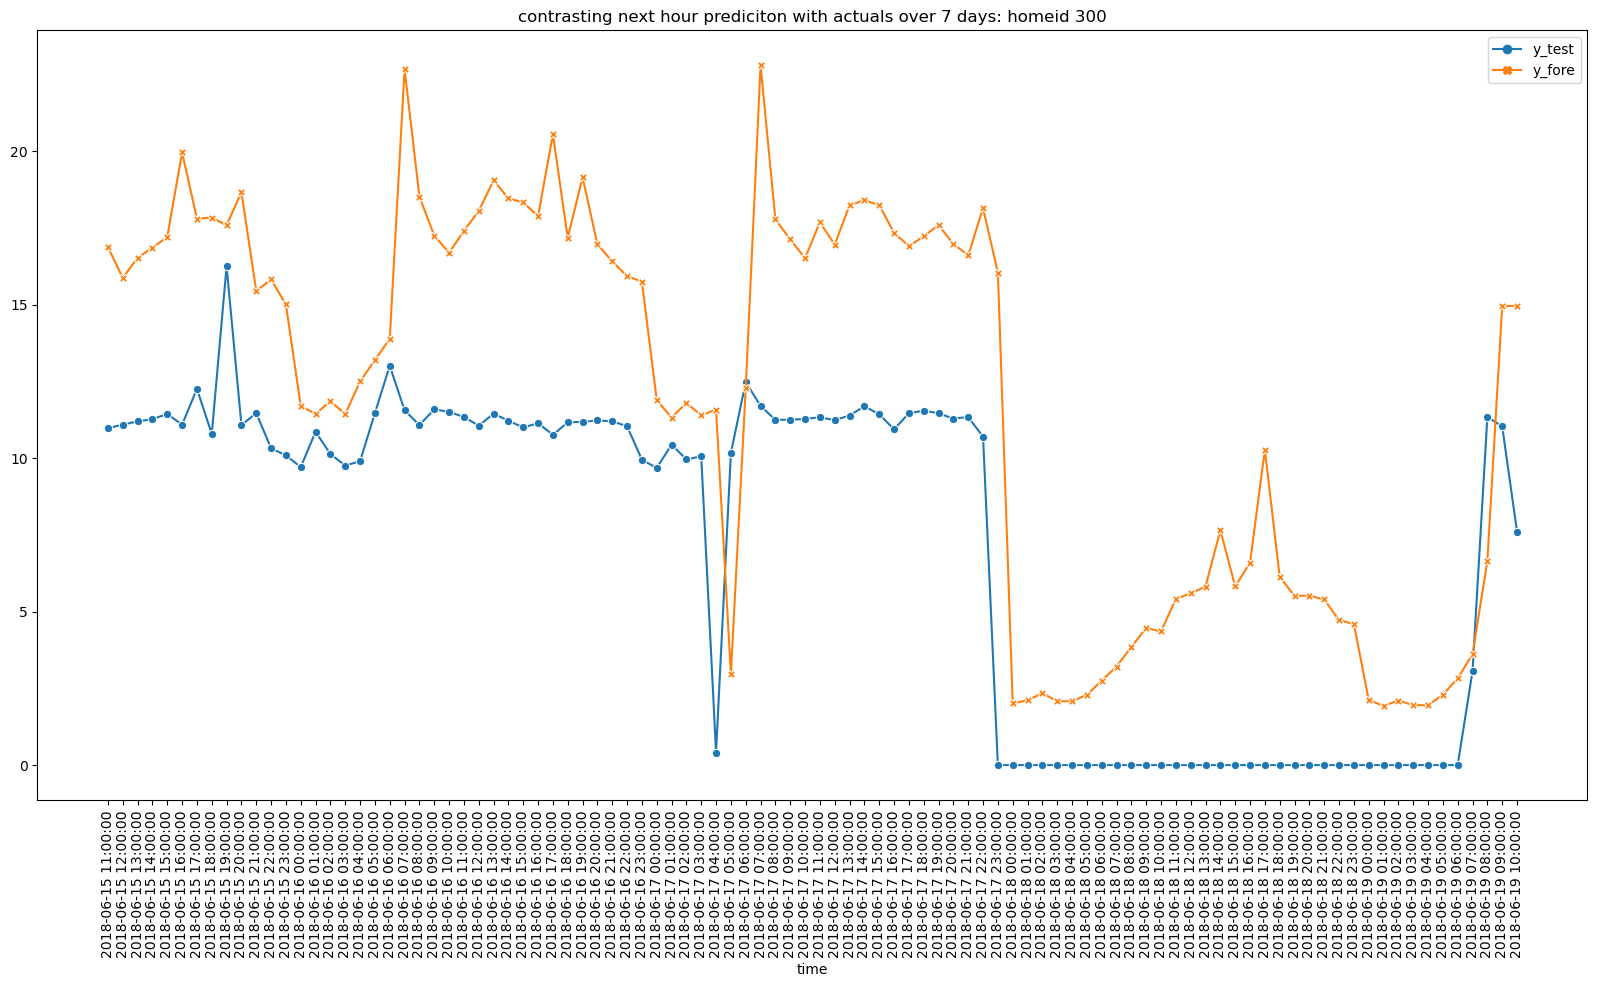

In [181]:
forecast(300)

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean absolute error: 12.527950085318885
mean absolute percentage error: 0.5022947228895368
R-squared error: 0.19982312172556038
______________


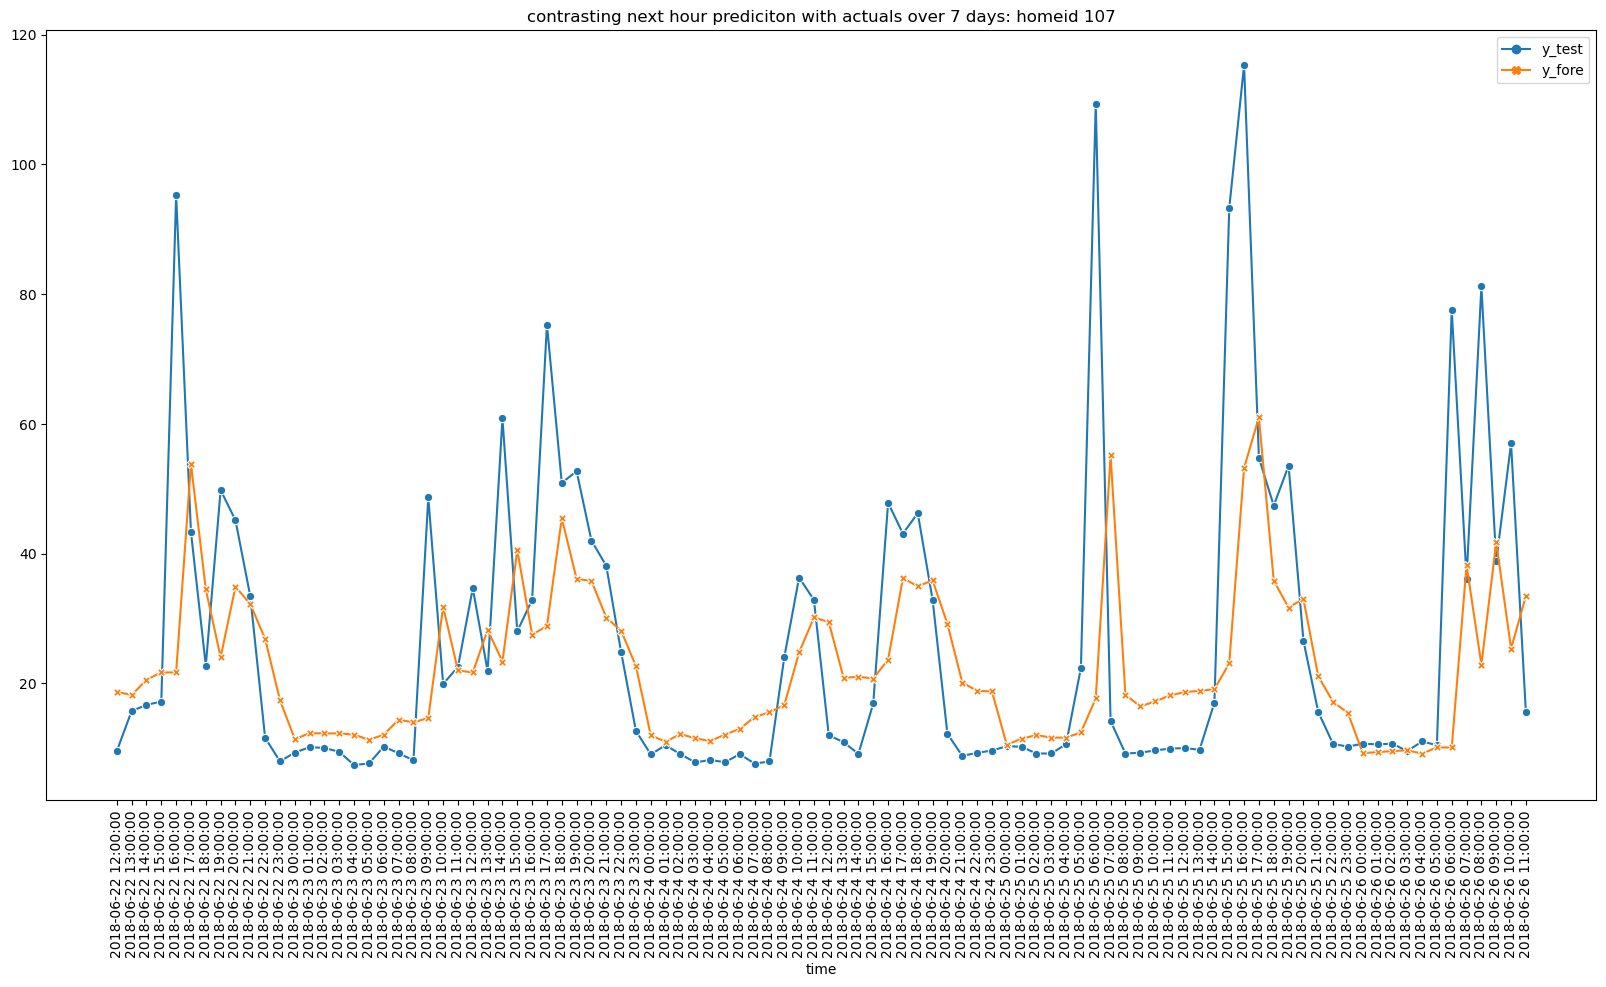

In [180]:
forecast(107)

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean absolute error: 6.182221571876668
mean absolute percentage error: 0.6239415858345476
R-squared error: 0.09315464331315404
______________


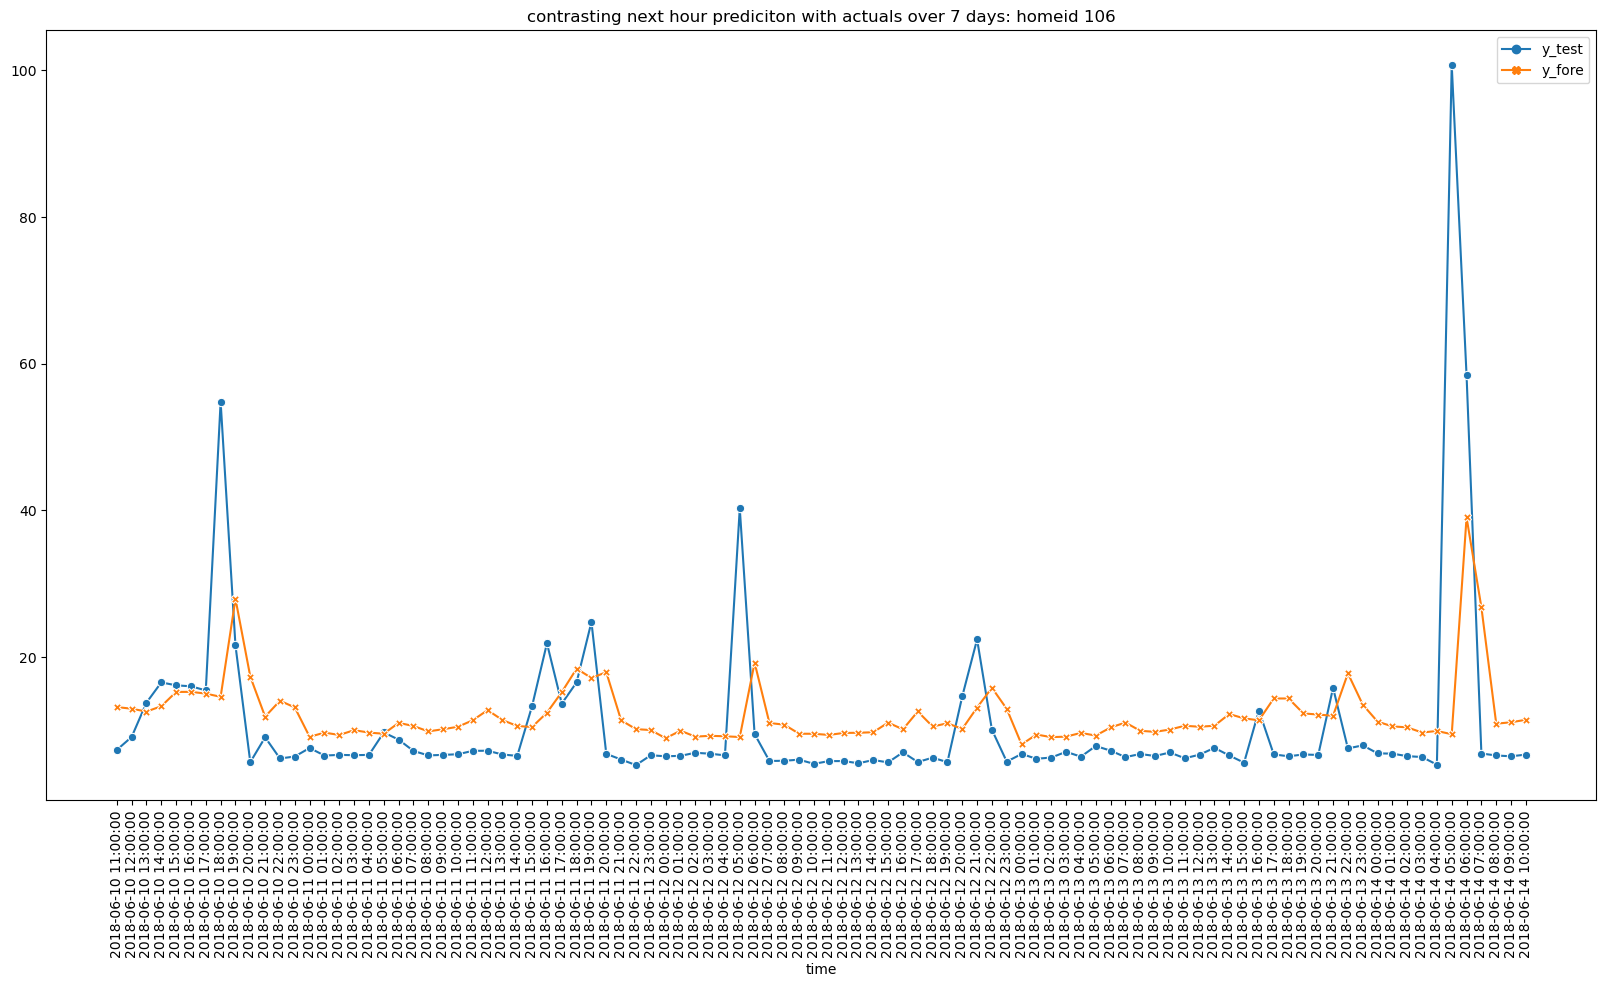

In [179]:
forecast(106)

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean absolute error: 5.737503165289112
mean absolute percentage error: 0.5557813962732886
R-squared error: 0.024474679886649975
______________


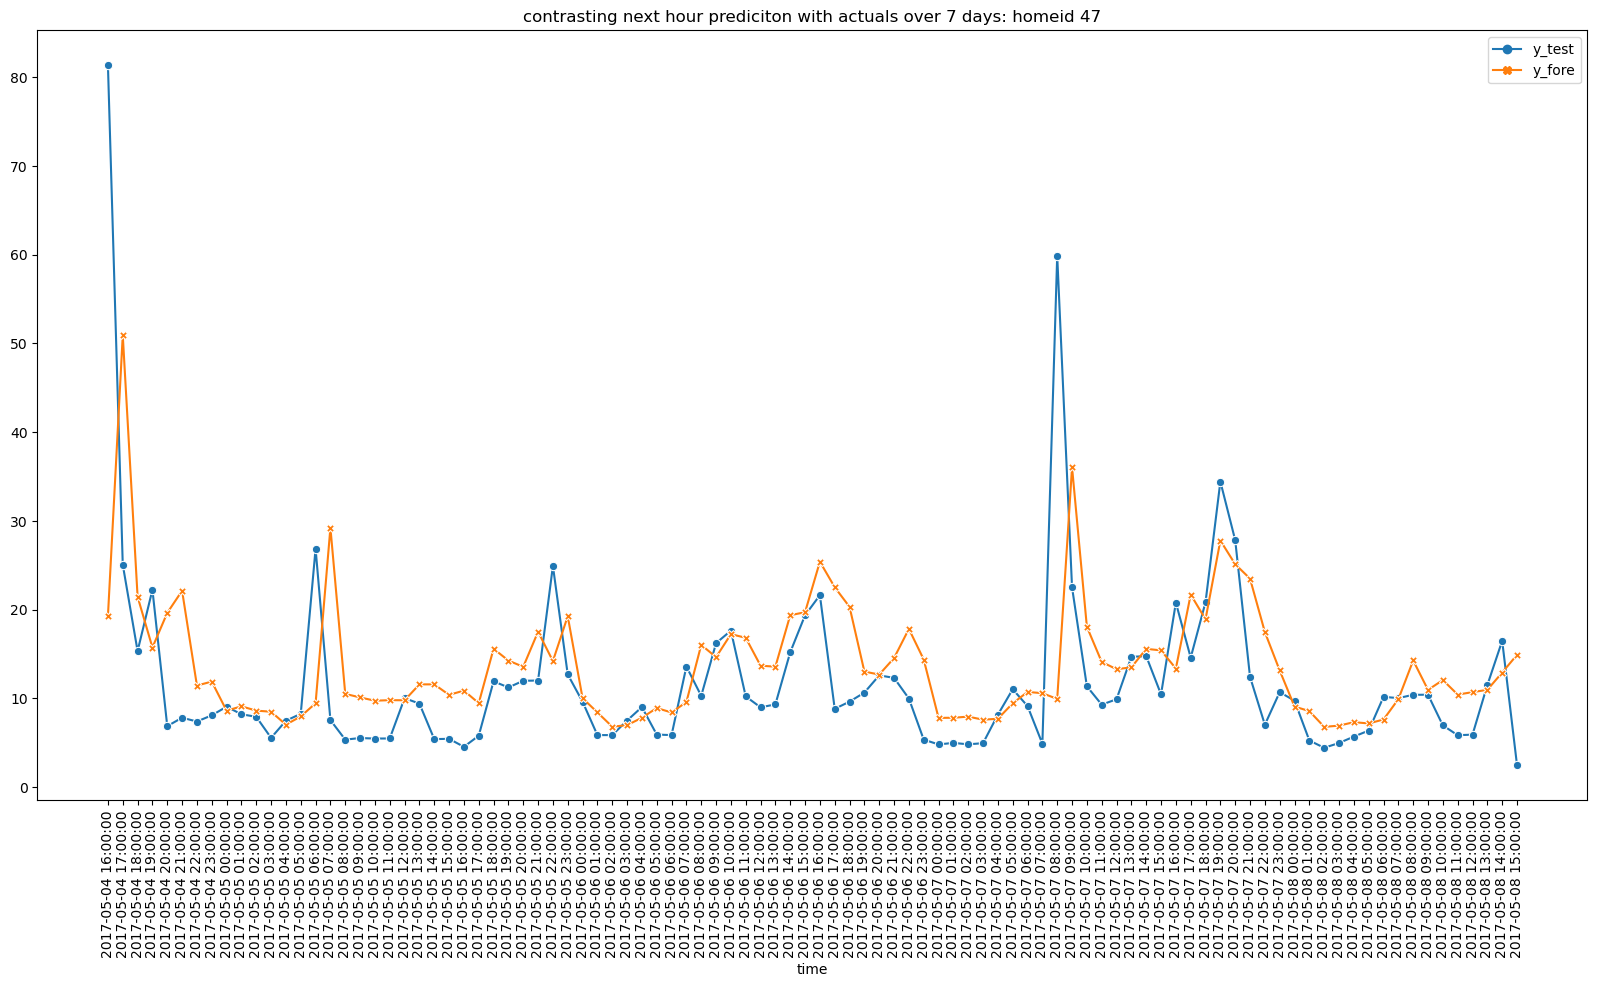

In [177]:
forecast(47)